In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('svm data.csv')

In [3]:
df.head()

,Unnamed: 0,feature1,feature2,label_y
0,0,8.660254,-5.00000,0
1,1,8.717792,-4.89899,0
2,2,8.773790,-4.79798,0
3,3,8.828277,-4.69697,0
4,4,8.881281,-4.59596,0


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,feature1,feature2,label_y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


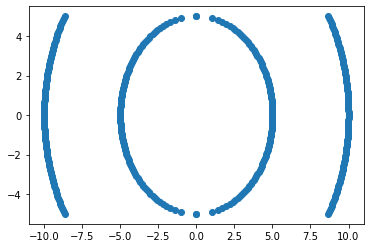

In [7]:
plt.scatter(df.feature1 , df.feature2 )

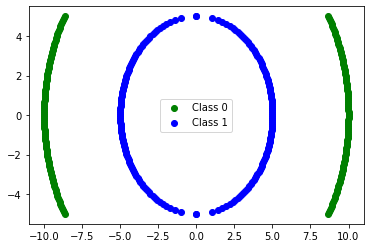

In [9]:
df1 = df[df.label_y == 0]
df2 = df[df.label_y == 1]

plt.scatter(df1['feature1'], df1['feature2'], color='green', label='Class 0')
plt.scatter(df2['feature1'], df2['feature2'], color='blue', label='Class 1')
plt.legend()

In [10]:
from sklearn.svm import SVC # x stands for classifier ; r stands for regressor

In [11]:
svm1 = SVC(kernel='linear')

In [13]:
x = df.drop('label_y',axis=1)

In [14]:
svm1.fit(x,df['label_y'])

SVC(kernel='linear')

In [15]:
svm1.score(x,df['label_y'])

0.5

# Lower to Higher Dimension

In [16]:
# A, B, A2, B2, AB
df['fe1_square'] = df['feature1'] ** 2
df['fe2_square'] = df['feature2'] ** 2
df['fe1_fe2'] = df['feature1']*df['feature2']

In [17]:
df.head()

,feature1,feature2,label_y,fe1_square,fe2_square,fe1_fe2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [18]:
X = df.drop('label_y', axis=1)
Y = df['label_y']

In [19]:
X.head()

,feature1,feature2,fe1_square,fe2_square,fe1_fe2
0,8.660254,-5.00000,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,78.877155,21.122845,-40.818009


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain,ytest = train_test_split(X,Y, test_size=.30, random_state=42)

In [23]:
xtrain.shape

(280, 5)

In [24]:
xtrain.head()

,feature1,feature2,fe1_square,fe2_square,fe1_fe2
157,-9.971263,-0.757576,99.426079,0.573921,7.553987
109,-9.124936,4.090909,83.264463,16.735537,-37.329285
17,9.445795,-3.282828,89.223038,10.776962,-31.008922
347,-4.993619,0.252525,24.936231,0.063769,-1.261015
24,9.662581,-2.575758,93.365473,6.634527,-24.888466


In [25]:
xtest.head()

,feature1,feature2,fe1_square,fe2_square,fe1_fe2
209,2.874798,-4.090909,8.264463,16.735537,-11.760537
280,3.938099,3.080808,15.508622,9.491378,12.132526
33,9.860133,-1.666667,97.222222,2.777778,-16.433555
210,3.013421,-3.989899,9.080706,15.919294,-12.023245
93,8.982945,4.393939,80.693297,19.306703,39.470515


In [26]:
xtest.shape

(120, 5)

In [27]:
svm2 = SVC(kernel='linear')

In [28]:
svm2.fit(xtrain,ytrain)

SVC(kernel='linear')

In [29]:
svm2.score(xtest, ytest)

1.0

In [32]:
import numpy as np

In [33]:
np.array(ytest)

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [34]:
pred = svm2.predict(xtest)
pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

# RBF Kenrel

In [35]:
svm3 = SVC(kernel='rbf')
svm3.fit(x,df['label_y'])

SVC()

In [36]:
svm3.score(x,df['label_y'])

1.0

In [39]:
df.head()

,feature1,feature2,label_y,fe1_square,fe2_square,fe1_fe2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [38]:
import plotly.express as pt

In [41]:
pt.scatter_3d(df,x='fe1_square', y='fe2_square', z='fe1_fe2',color='label_y')